##            Kaggle: Telco Customer Churn
#### 1. Demographic:

 a. Which 2 demographics have proven to be the most popular with the telco brand

 b. If the marketing team wanted to increase customer retention, to whom should they target their advertisements?

#### 2. Services:

 a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use             visualizations in explaining your analysis)

 b. If the telco was to offer Phone as a standalone service, which type of contract would encourage customer           retention?

#### 3. Payment: (Use visualizations in explaing your analysis)

 a. If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be             appropriate for the following packages to keep customers from churning:

   i.   Basic
   
   ii.  Plus
   
   iii. Premium

 b. Should the company strictly go paperless for their monthly billings as a technique of keeping thier customers       and why?



# 1.0 Importing necessary Python Libraries

In [3]:
#importing standard libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.1 Reading Data From our csv file

In [5]:
#creating a dataframe and naming it telcoChurn
telcoChurn=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
telcoChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1.2 Exploring our Dataset

In [3]:
#finding out the number of rows and columns in our dataset
telcoChurn.shape

(7043, 21)

In [9]:
#getting information about our dataframe
telcoChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
#summary statistics for numeric columns
telcoChurn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 1.3 Data Cleaning

In [13]:
#checking for any null values
telcoChurn[telcoChurn.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### We do not have ant null values within our dataframe

In [16]:
#checking for duplicates
telcoChurn[telcoChurn.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


#### We do not have any duplicate rows in our dataset

In [162]:
#checking if columns names have spaces
telcoChurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# 1.4 Analysis(Answering Research Questions)

## 1.4.1 Demographic

### 1.4.1 a)Which 2 demographics have proven to be the most popular with the telco brand?


In [20]:
## From our Dataset demographic columns are 'gender', 'SeniorCitizen', 'Partner', 'Dependents' 
##breakdown of these variables can be seen by
telcoChurn.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])["Churn"].count().unstack()


Dependents                      No  Yes
gender SeniorCitizen Partner           
Female 0             No       1338  142
                     Yes       596  844
       1             No        317    3
                     Yes       209   39
Male   0             No       1381  211
                     Yes       567  822
       1             No        244    5
                     Yes       281   44

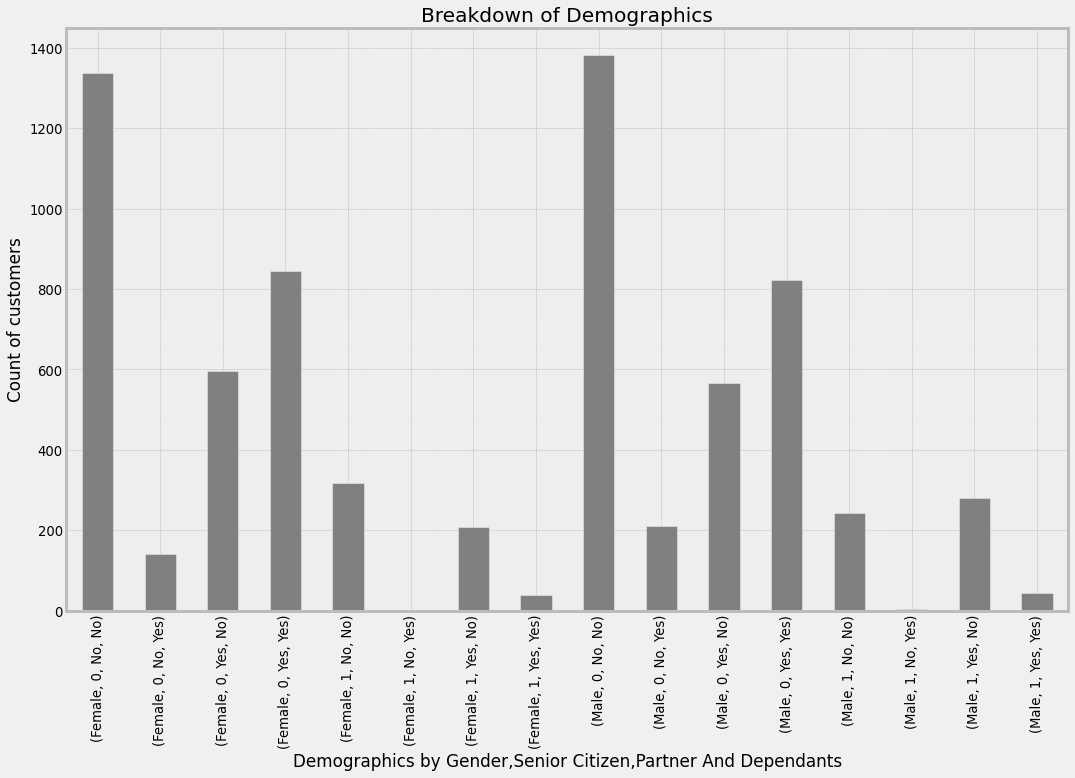

In [161]:
#plotting this data
from matplotlib import style 
plt.figure(figsize=(16,10))
telcoChurn.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])["Churn"].count().plot(kind="bar",color="gray")
plt.ylabel("Count of customers")
plt.xlabel("Demographics by Gender,Senior Citizen,Partner And Dependants")
plt.title("Breakdown of Demographics")
#plt.style.use('bmh')
plt.show()

### The two most popular demographics with the telco brand are:
###    Males who are not Senior Citizens,do not have partners and do not have dependants,they are about 1381
###     Females who are not Senior Citizens,do not have partners and do not have dependants,they are about 1338
   

## 1.4.1 b)If the marketing team wanted to increase customer retention, to whom should they target their advertisements?

In [27]:
#breakdown of data by demographics and Churn
telcoChurn.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents','Churn'])["Churn"].count().unstack()


Churn                                     No  Yes
gender SeniorCitizen Partner Dependents          
Female 0             No      No          909  429
                             Yes         110   32
                     Yes     No          482  114
                             Yes         720  124
       1             No      No          159  158
                             Yes           2    1
                     Yes     No          136   73
                             Yes          31    8
Male   0             No      No          963  418
                             Yes         168   43
                     Yes     No          439  128
                             Yes         717  105
       1             No      No          126  118
                             Yes           4    1
                     Yes     No          176  105
                             Yes          32   12

In [163]:
#filtering data to customers that have churned and breakdown by demographics
churned=telcoChurn[telcoChurn["Churn"]=="Yes"]
churned.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents','Churn'])["Churn"].count().unstack()


Churn                                    Yes
gender SeniorCitizen Partner Dependents     
Female 0             No      No          429
                             Yes          32
                     Yes     No          114
                             Yes         124
       1             No      No          158
                             Yes           1
                     Yes     No           73
                             Yes           8
Male   0             No      No          418
                             Yes          43
                     Yes     No          128
                             Yes         105
       1             No      No          118
                             Yes           1
                     Yes     No          105
                             Yes          12

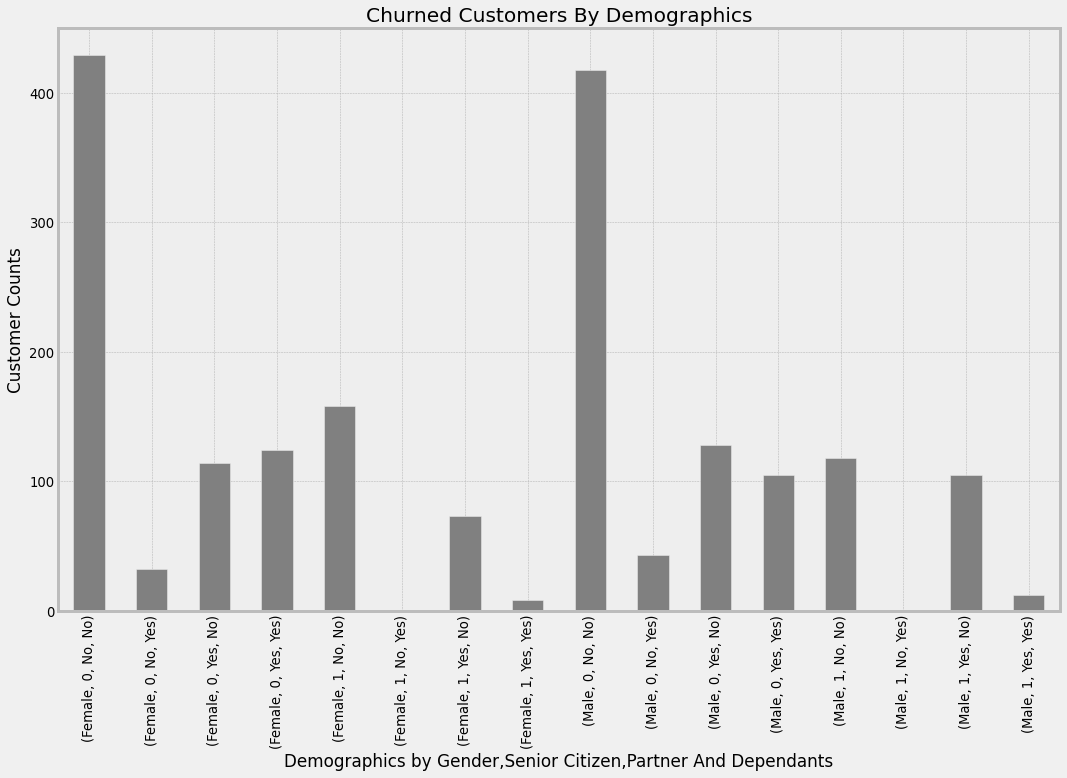

In [160]:
#plotting the data
plt.figure(figsize=(16,10))
churned.groupby(['gender', 'SeniorCitizen', 'Partner', 'Dependents'])["Churn"].count().plot(kind='bar',color="gray")
plt.title("Churned Customers By Demographics")
plt.xlabel("Demographics by Gender,Senior Citizen,Partner And Dependants")
plt.ylabel("Customer Counts")
#plt.style.use('bmh')

plt.show()

### The marketing team should target their advertisements to both male and females who are not senior citizens,do not have partners and do not have dependants as they are the ones who churn more

## 1.4.2 Services

### 1.4.2 a)Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

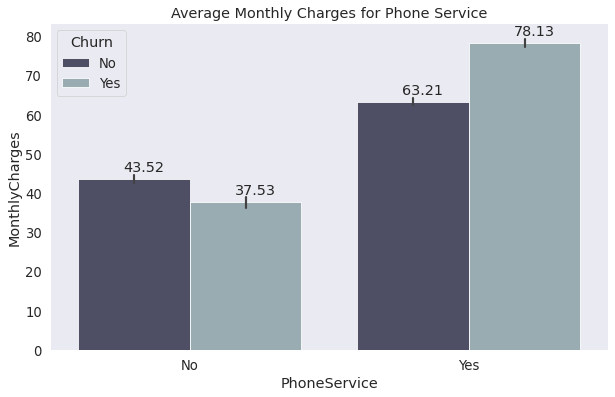

In [132]:
#From our dataframe services are  are
#PhoneService', 'MultipleLines', 'InternetService'   'OnlineSecurity', 'OnlineBackup',
#'DeviceProtection', 'TechSupport',StreamingTV', 'StreamingMovies'
#visualizing each service with monthly charge
plt.figure(figsize=(10,6))
sns.set_context("paper",font_scale=1.5)
sns.set_style("dark")
ax=sns.barplot(x="PhoneService",y="MonthlyCharges",hue="Churn",data=telcoChurn,palette="bone")
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.16, p.get_height()+2))
plt.title("Average Monthly Charges for Phone Service")
plt.show()


In [70]:
#writing a function to visualize other services
def plotdata(column):
    plt.figure(figsize = (10,8))
    sns.set_context("paper",font_scale=1.5)
    ax=sns.barplot(x = column, y = 'MonthlyCharges', data = telcoChurn, hue = 'Churn',palette="bone")
    for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+2))
    plt.tight_layout
    plt.title("Average Monthly Charges for"+" "+str(column))
    plt.show()

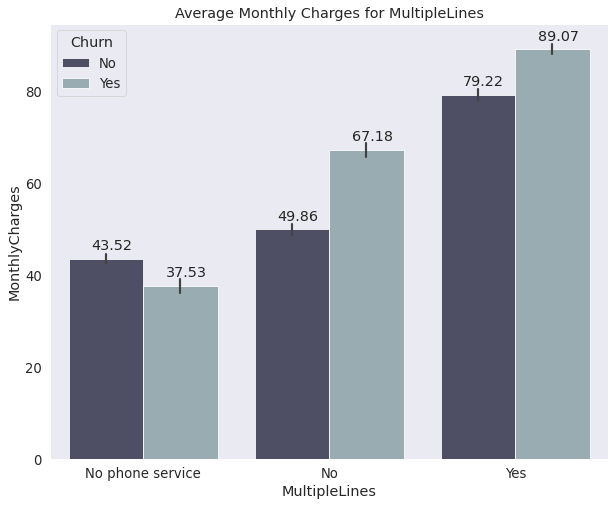

In [71]:
plotdata('MultipleLines')

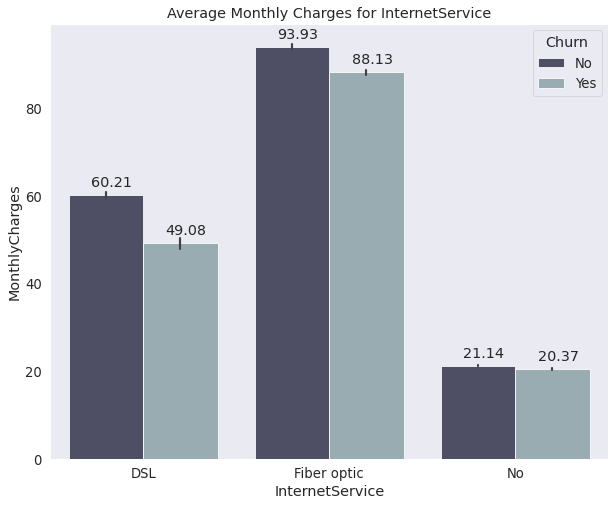

In [73]:
plotdata('InternetService')

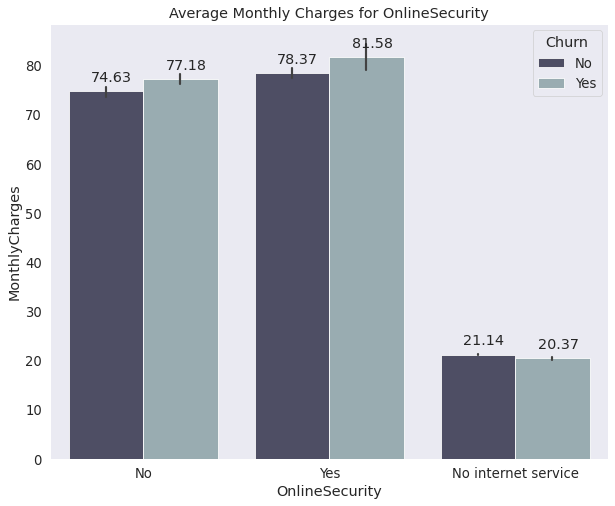

In [74]:
plotdata('OnlineSecurity')

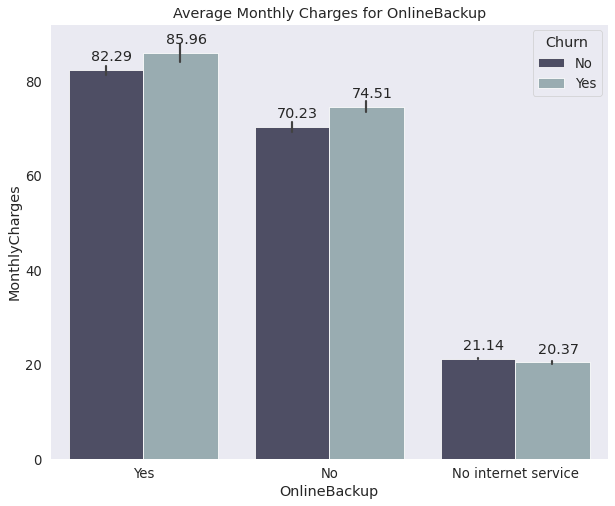

In [75]:
plotdata('OnlineBackup')

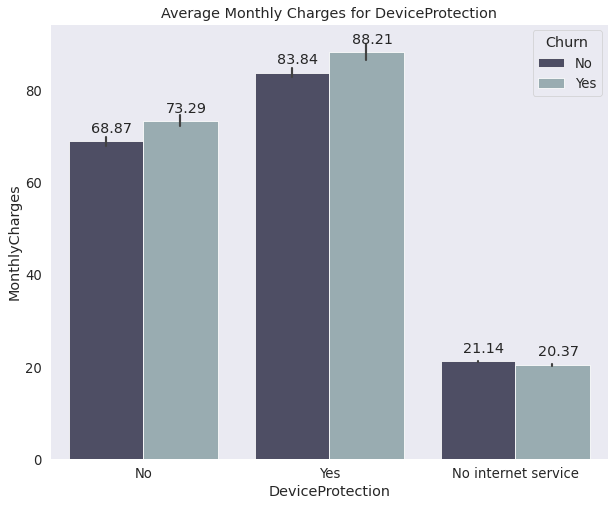

In [76]:
plotdata('DeviceProtection')

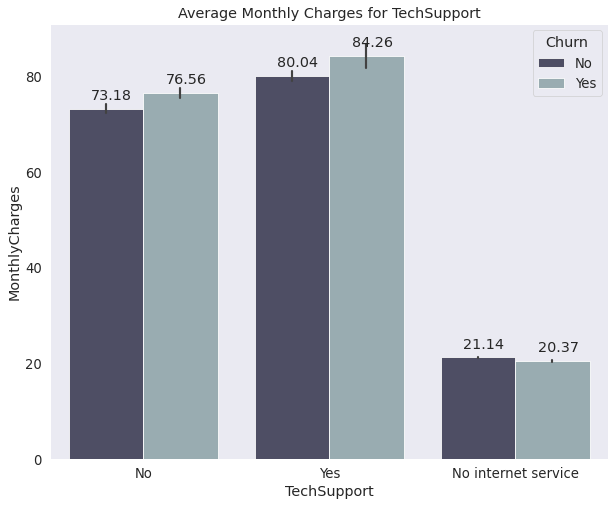

In [77]:
plotdata('TechSupport')

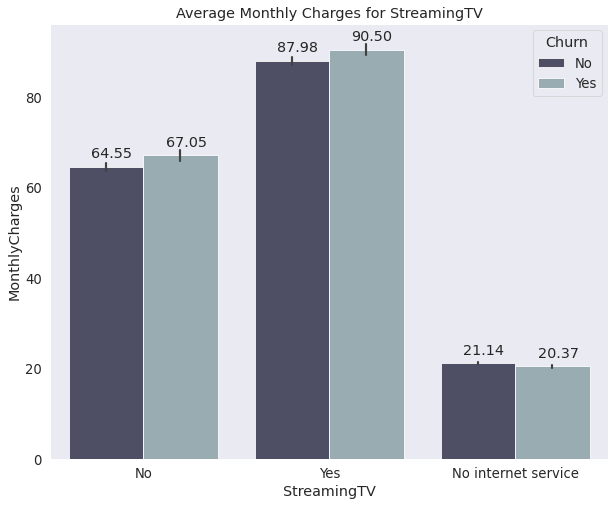

In [78]:
plotdata('StreamingTV')

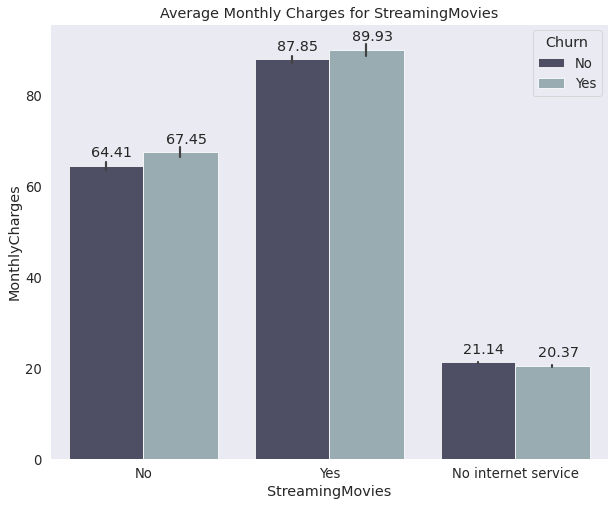

In [79]:
plotdata('StreamingMovies')

### Streaming Tv(90.5),Streaming Movies(89.93) and Multiple Lines(89.07) are the three services with high monthly charges leading to customers churning.

## 1.4.2 b)If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention?

In [85]:
#splitting dataframe to have phone service only
phoneService=telcoChurn[telcoChurn["PhoneService"]=="Yes"]

In [86]:
#showing a breakdown of phone servive,cintract and Churn
phoneService.groupby(['PhoneService', 'Contract', 'Churn'])['Churn'].count().unstack()

Churn                          No   Yes
PhoneService Contract                  
Yes          Month-to-month  1997  1502
             One year        1176   152
             Two year        1489    45

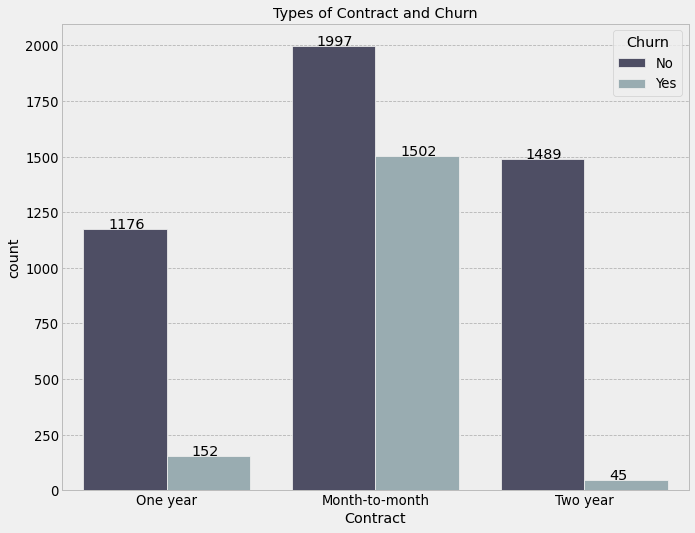

In [166]:
#plotting this data
plt.figure(figsize = (10,8))
sns.set_context("paper",font_scale=1.5)
ax=sns.countplot(x="Contract",hue="Churn",data=phoneService,palette="bone")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.12, p.get_height()+2))
plt.title("Types of Contract and Churn")  
plt.show()


### Two year Contract would encourage customer retntion as it has the least churn i.e around 2.9%

## 1.4.3 Payments

### 1.4.3 a) If the company was to streamline all its services into 3 bouquet packages, what monthly prices will be appropriate for the following packages to keep customers from churning:

### i. Basic

### ii. Plus

### iii. Premium

In [7]:
## splitting data to those that have not churned
no_churn=telcoChurn[telcoChurn["Churn"]=="No"]

In [110]:
#analysing the monthly charges column
no_churn["MonthlyCharges"].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

Text(0.5, 1.0, 'Boxplot showing the Spread of monthly Charges')

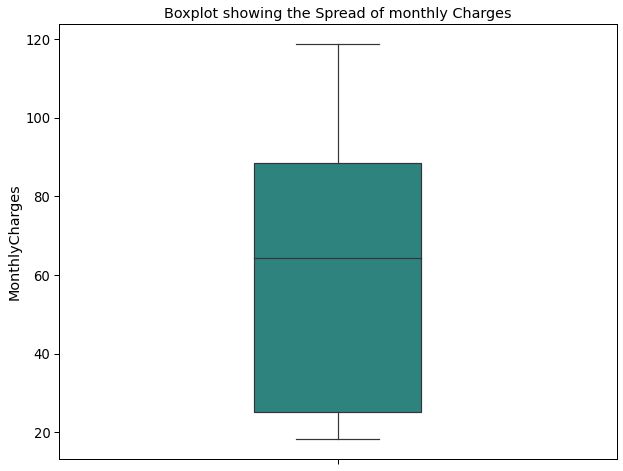

In [11]:
#visualizing the data
plt.figure(figsize = (10,8))
sns.set_context("paper",font_scale=1.5)
sns.boxplot(y="MonthlyCharges",data=no_churn,width=0.3,palette="viridis")
plt.title("Boxplot showing the Spread of monthly Charges")

### Monthly prices that are appropriate for the packages are 25.10 for Basic,64.3 for Plus and 88.40 for Premium

## 1.4.3 b)Should the company strictly go paperless for their monthly billings as a technique of keeping thier customers and why?

In [116]:
#columns of interest are Paperlessbilling and Churn
telcoChurn.groupby(["PaperlessBilling","Churn"])["Churn"].count().unstack()

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


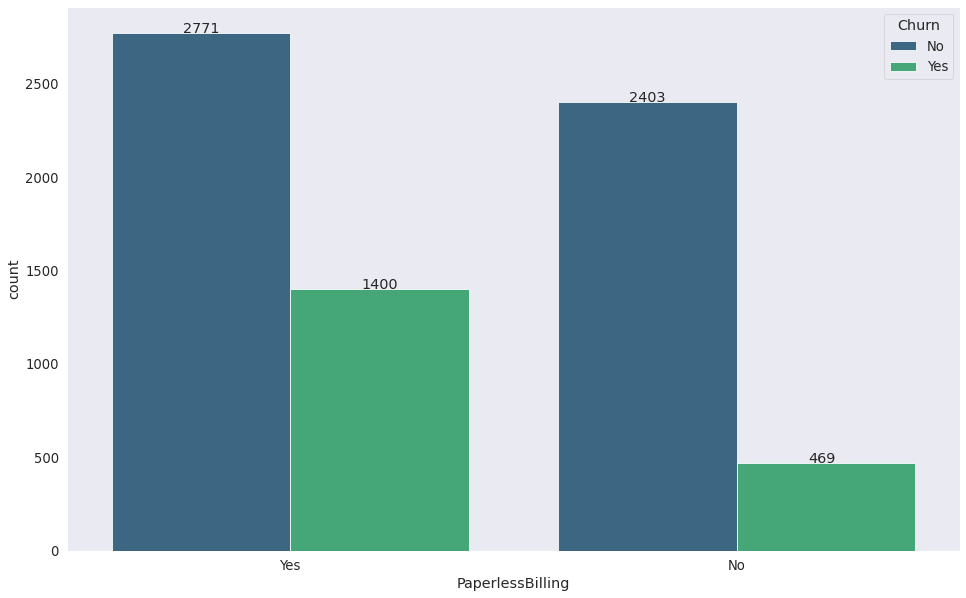

In [123]:
#plotting the data
plt.figure(figsize=(16,10))
ax=sns.countplot(x="PaperlessBilling",hue="Churn",data=telcoChurn,palette="viridis")
for p in ax.patches:
    ax.annotate("{:.0f}".format(p.get_height()),(p.get_x()+0.16,p.get_height()+0.2))


### The company should not go strictly paperless since customers that do not use paperless billing have a lower churn than those that use paperless billing,however most customers prefer paperless billing.